# ML Course 3 - Practice

### <span style="color:red"> WRITE YOUR NAME HERE: </span>   SENA NUR BILGIN

## Subject

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE (L)** e.g. 2.0
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182

In [236]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import stats
import statsmodels.api as sm


In [237]:
data = pd.read_csv("/Users/xenanurbilgin/XENA_FOLDERS/EPITA/EPITA_SENA/Machine_Learning/Assignment3/FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [238]:
#Checking the correlation matrix to see the relavant fetures:
# Select only numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
numeric_columns = numeric_columns.drop("MODELYEAR", axis=1)
# Calculate the correlation matrix among numeric features
corr = numeric_columns.corr()
# Apply the gradient color map to the correlation matrix and display it
corr.style.background_gradient(cmap='coolwarm')


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


# Part 0 - Preparing the dataset 

### Define X and y
- You want to predict **CO2EMISSIONS**
- Your feature matrix will only contain **ENGINESIZE**
- Define both variables as 2-dimensional numpy arrays

In [239]:
# Extract 'ENGINESIZE' column as a NumPy array
X = data[["ENGINESIZE"]].to_numpy()
# Extract 'CO2EMISSIONS' column as a NumPy array
y = data[["CO2EMISSIONS"]].to_numpy()


In [240]:
# Test your code
assert isinstance(X, np.ndarray), "❌ X should be a NumPy array"
assert isinstance(y, np.ndarray), "❌ y should be a NumPy array"
assert X.shape == (data.shape[0], 1), "❌ Incorrect X shape"
assert y.shape == (data.shape[0], 1), "❌ Incorrect y shape"
print("OK 👌")

OK 👌


### Split your training and test set 

In [241]:
# Split the data into training and testing sets
# X_train and X_test will contain the features, while y_train and y_test will contain the target variable
# test_size = 0.25 specifies that 25% of the data will be used for testing, and the rest for training
# random_state = 42 sets the random seed for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) # Use random_state=42 and a test size of 25%

## Part 1 - Recoding linear regression 

We will code a class as if it were a Sklearn object. 
We will build it together, step by step.  
Let's first introduce you to a new type of sklearn object: the Estimator (see [documentation](https://scikit-learn.org/stable/developers/develop.html#estimators)).  
It has two main methods:
- **fit(X, y)** -> None: that allows the model to learn from the training data
- **predict(X)** -> np.ndarray: that predicts the target variable based on the input features  

The predict() method must be called AFTER fit() has been called.

### Warm-up: Dummy Regression
You will make a dummy regressor that always predicts the **mean CO2** from the training set.  
This is the most simple model we can have, as it contains only **one parameter**.  
For you own understanding, start by calculating the mean of the CO2 variable contained in y_train.

In [242]:
# Calculate the mean of y_train
mean_y_train = np.mean(y_train)
# Print the mean
print("Mean of y_train:", mean_y_train)

Mean of y_train: 256.52875


The **DummyRegression** class is partially written for you, following sklearn's API. You need to complete two methods:
- Implement the **fit( )** so that it calculates the average CO2 emission contained in the y_train vector (and ignores X_train for now)
- Implement the **.predict( )** method so that it stupidly predicts the same value for all examples given in X. The returned vector should have the same dimensions as y_train, but all predicted values should be equal to the mean that was found with the fit() method.

In [243]:

class DummyRegression:
    def __init__(self):
        self.mean = 0
        
    def fit(self, X, y):
        # Calculate the mean of the target variable
        self.mean = y.mean()
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Return an array filled with the mean value for the same length as the input X
        return np.full_like(X, self.mean)


Use your Dummy Regressor to make predictions on the training set

In [244]:
# Instantiate estimator
dummy_regression = DummyRegression()
# Fit  estimator to the training data
dummy_regression.fit(X_train, y_train)
# Generate predictions on the training data
predictions_Model1 = dummy_regression.predict(X_train)
# Print the predictions
print("Predictions:", predictions_Model1)


Predictions: [[256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]
 [256.52875]

In [245]:
# Test your code
assert isinstance(predictions_Model1, np.ndarray), "❌ Your regressor should return a numpy array."
assert predictions_Model1.shape == y_train.shape, "❌ Your prediction output should have the same shape as y_train."
assert np.all(predictions_Model1 > 0)
assert np.all(predictions_Model1 == predictions_Model1[0]), "❌ The dummy regressor always has the same output"
print("👌 Seems good, but check your output value with your classmates.")

👌 Seems good, but check your output value with your classmates.


#### Now use this function to plot your predictions in a graph 

In [246]:

def plot_regression(X_train, y_train, X_test, y_test, regression_model):
    X_regression_line = X_test.squeeze()
    y_regression_line = regression_model.predict(X_test).reshape(-1, 1)
    plt.figure(figsize=(16, 8))
    plt.scatter(X_train, y_train, c='lightgray', label='training set')
    plt.scatter(X_test, y_test, c='black', label='test set')
    plt.plot(X_regression_line, y_regression_line, c='blue', label='regression line', linewidth=2)
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    plt.show()


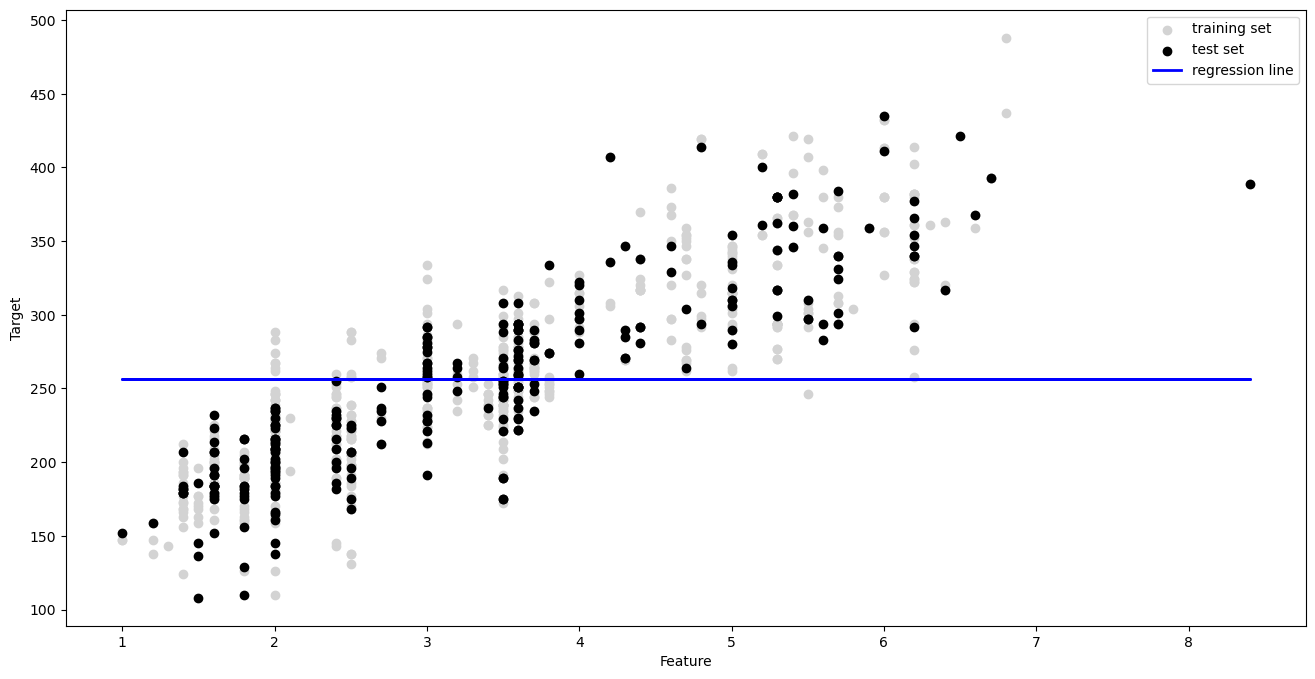

In [247]:
plot_regression(X_train,y_train,X_test,y_test,dummy_regression)

### Linear regression with one variable

Implement the .predict( ) method in the class below.  
Use the the linear equation that uses beta 0 and beta 1.  
 $$
\hat{y} = \beta_{0} + \beta_{1} * x
$$

In [248]:

class MyLinearRegression:
    def __init__(self):
        self.beta_0 = 0.
        self.beta_1 = 0.
    
    def set_beta_0(self, beta_0: float):
        self.beta_0 = beta_0
        
    def set_beta_1(self, beta_1: float):
        self.beta_1 = beta_1

    def predict(self, X):
        assert len(X.shape) == 2 and X.shape[1] == 1, "❌ X needs to have shape (m, 1)"
        # Compute predictions using the fitted coefficients
        return self.beta_0 + self.beta_1 * X


Test your model with various values of beta and see what happens when you plot the result.  
By trial and error, find the optimal values for beta 0 and beta 1.

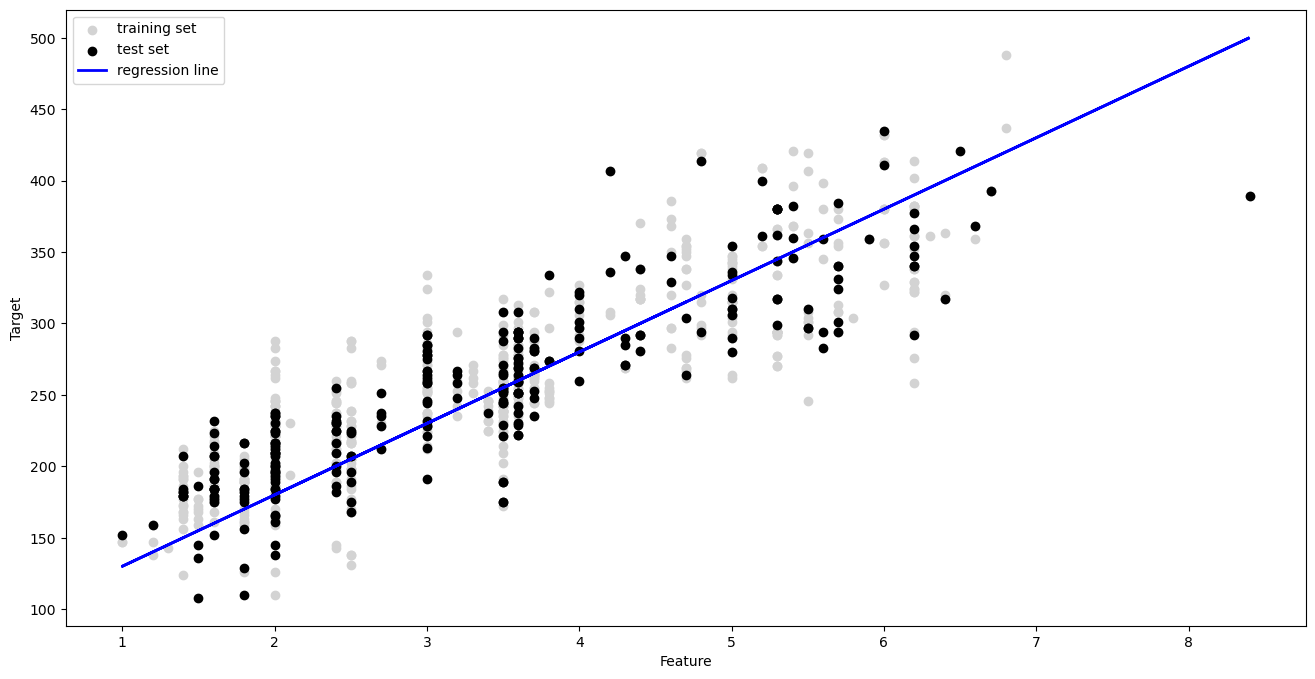

In [249]:
# Instantiate  custom linear regression model
my_linear_regression_withoutT = MyLinearRegression()
my_linear_regression_withoutT.set_beta_0(80)
my_linear_regression_withoutT.set_beta_1(50)
# Plot the regression line
plot_regression(X_train, y_train, X_test, y_test, my_linear_regression_withoutT)


### Cost function 

How much error/deviation you have in your model? How entire it is?

Write a function that calculates the cost of an array of predictions. Use the following equation for the cost function, which is very close to the Mean Square Error:
$$
\text{Cost} = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2
$$

In [250]:
def cost_function(y, predictions):
    # Calculate squared errors
    squared_errors = np.square(predictions - y)
    # Calculate the sum of squared errors
    sum_squared_errors = np.sum(squared_errors)
    # Get the number of samples
    m = len(y)
    # Calculate the cost
    cost = sum_squared_errors / (2 * m)
    return cost


Test your cost function

In [251]:
# Calculate the cost on the training set
cost_train = cost_function(y_train, (my_linear_regression_withoutT.predict(X_train)))
print("Cost on training set:", cost_train)
# Calculate the cost on the test set
cost_test= cost_function(y_test, (my_linear_regression_withoutT.predict(X_test)))
print("Cost on test set:", cost_test)


Cost on training set: 637.988125
Cost on test set: 611.3258426966293


In [252]:
# Test your code
#assert isinstance(cost_function(y_train, predictions), float), "❌ The output of the cost function should be a float."
assert cost_function(np.array([1,1,1]), np.array([2,3,4])) == 14 / 2 / 3, "❌ The calculation of your cost is not quite right."
print("Looks good! 👌")

Looks good! 👌


Test the cost of your predictions whith the optimal beta values that you found previously and see what happens if you move away from your optimal value.

In [253]:
# Instantiate  custom linear regression model
my_linear_regression_withoutT = MyLinearRegression()
# Set coefficients to 0 (though it's not necessary since they are initialized to 0)
my_linear_regression_withoutT.set_beta_0(50)
my_linear_regression_withoutT.set_beta_1(70)
# Generate predictions on the test data
predictions_Model2_test = my_linear_regression_withoutT.predict(X_test)
predictions_Model2_training= my_linear_regression_withoutT.predict(X_train)
# Calculate the cost using the custom cost function
cost_test = cost_function(y_test, predictions_Model2_test)
# Calculate the cost using the custom cost function
cost_training = cost_function(y_train, predictions_Model2_training)
# Calculate the Mean Squared Error (MSE) using scikit-learn's mean_squared_error function
MSE_test = mean_squared_error(y_test, predictions_Model2_test)
r2= r2_score(y_test , my_linear_regression_withoutT.predict(X_test))
print("Test MSE:", MSE_test)
print("Test Cost:", cost_test)
print("Training Cost:", cost_training)
print("R2 score:", r2)

Test MSE: 3703.775280898876
Test Cost: 1851.887640449438
Training Cost: 1809.523125
R2 score: 0.1070880657906712


### Model training  (Bonus)

Implement the fit function using the gradient descent algorithm.  
Remember, at each iteration, you need to calculate the increment step with the partial derivatives of the cost function with respect to beta_0 and beta_1, and THEN update your parameters.  
Use alpha as the learning rate to decrease the size of your steps.

Alpha is a **hyperparameter**, which is why it is defined in the constructor of the class.

In [254]:
class MyLinearRegressionOnSteroids:
    def __init__(self, alpha=0.05):
        self.beta_0 = 0.
        self.beta_1 = 0.
        self.alpha = alpha
    
    def set_beta_0(self, beta_0: float):
        self.beta_0 = beta_0
        
    def set_beta_1(self, beta_1: float):
        self.beta_1 = beta_1
        
    def predict(self, X):
        assert len(X.shape) == 2 and X.shape[1] == 1, "❌ X needs to have shape (m, 1)"
        # Compute predictions using the fitted coefficients
        return self.beta_0 + self.beta_1 * X
        
    def fit(self, X, y, n_iterations=500):
        for iteration in range(n_iterations):
            # Make predictions
            y_pred = self.predict(X)
            # Compute the cost
            cost = np.mean((y_pred - y) ** 2) / 2
            
            # Compute the gradient components 
            gradient_0 = np.mean(y_pred - y)
            gradient_1 = np.mean((y_pred - y) * X)
            
            # Update beta_0 and beta_1 using gradient descent
            self.beta_0 -= self.alpha * gradient_0
            self.beta_1 -= self.alpha * gradient_1
            
            print(f"Iteration {iteration+1}: beta=({self.beta_0:.2f}, {self.beta_1:.2f}), cost={cost:.2f}")


Test your fit method to see if it seems to converge

Iteration 1: beta=(12.83, 46.73), cost=34886.82
Iteration 2: beta=(17.21, 60.58), cost=4368.62
Iteration 3: beta=(19.06, 64.59), cost=1623.80
Iteration 4: beta=(20.14, 65.65), cost=1366.51
Iteration 5: beta=(21.00, 65.83), cost=1332.16
Iteration 6: beta=(21.78, 65.75), cost=1317.95
Iteration 7: beta=(22.54, 65.59), cost=1305.69
Iteration 8: beta=(23.29, 65.41), cost=1293.77
Iteration 9: beta=(24.03, 65.22), cost=1282.03
Iteration 10: beta=(24.76, 65.04), cost=1270.46
Iteration 11: beta=(25.49, 64.85), cost=1259.05
Iteration 12: beta=(26.21, 64.66), cost=1247.81
Iteration 13: beta=(26.93, 64.48), cost=1236.73
Iteration 14: beta=(27.64, 64.30), cost=1225.80
Iteration 15: beta=(28.34, 64.12), cost=1215.03
Iteration 16: beta=(29.05, 63.94), cost=1204.41
Iteration 17: beta=(29.74, 63.76), cost=1193.95
Iteration 18: beta=(30.44, 63.58), cost=1183.63
Iteration 19: beta=(31.12, 63.40), cost=1173.46
Iteration 20: beta=(31.80, 63.23), cost=1163.44
Iteration 21: beta=(32.48, 63.05), cost=1153.55


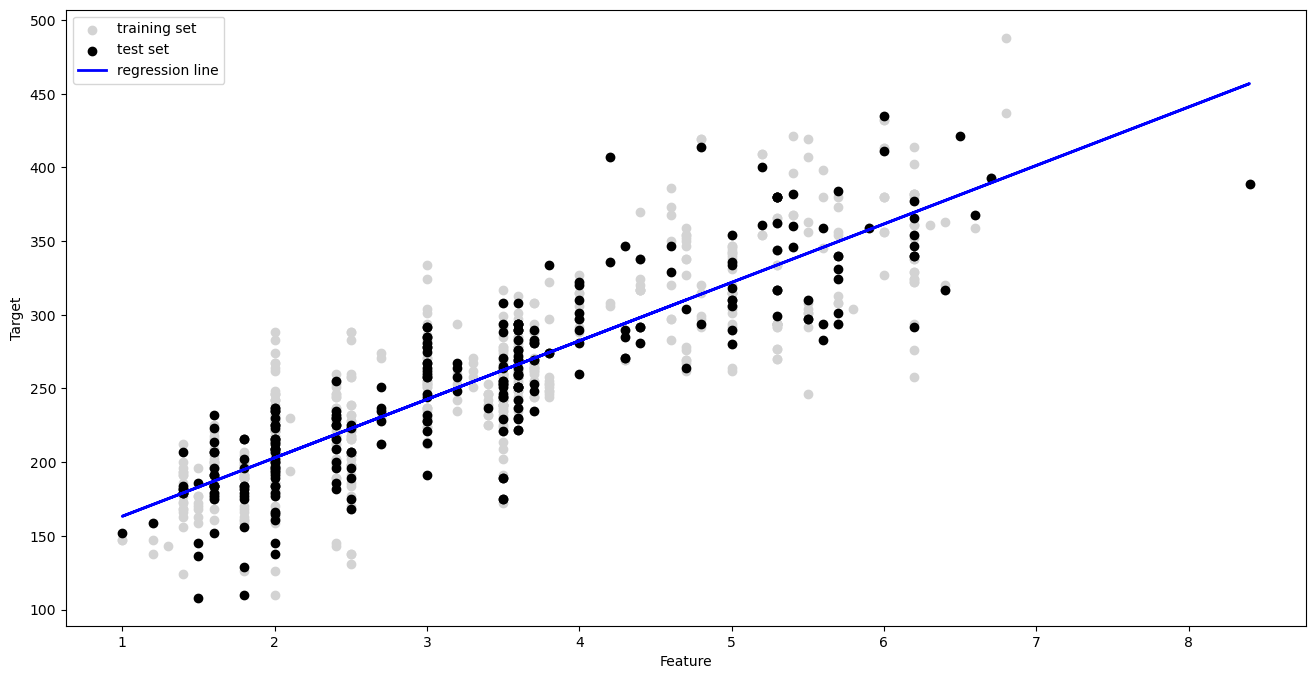

Test MSE: 968.7507648781346
R2 score: 0.7664520513177109


In [255]:
# Example usage:
# Assuming we have X_train and y_train data arrays
# Instantiate the optimized MyLinearRegressionOnSteroids class with alpha=0.05
MyLinearRegressionOnSteroids_Optimized = MyLinearRegressionOnSteroids(alpha=0.05)
# Fit the model to the training data
MyLinearRegressionOnSteroids_Optimized.fit(X_train, y_train)
# Plot the regression line along with the training and test data points
plot_regression(X_train, y_train, X_test, y_test, MyLinearRegressionOnSteroids_Optimized)
# Generate predictions on the test data
predictions_Model3 = MyLinearRegressionOnSteroids_Optimized.predict(X_test)
# Calculate the Mean Squared Error (MSE) using scikit-learn's mean_squared_error function
MSE_test = mean_squared_error(y_test, predictions_Model3)
r2= r2_score(y_test , predictions_Model3)
print("Test MSE:", MSE_test)
print("R2 score:", r2)



## Part 2 - Data exploration

For these questions, you may use your entire dataset (i.e. without train/test split), which is stored as a pandas DataFrame in the *data* variable.  

### 1. Compute the correlation value between the CO2 emission and the engine size. 

In [256]:
correlation_coefficient = data['CO2EMISSIONS'].corr(data['ENGINESIZE'])
print(correlation_coefficient)
print('High Strength Positive Correlation')

0.8741543683958127
High Strength Positive Correlation


📝 Do you think that the engine size can be taken as a unique predictor for the CO2 emission? Why?

Larger engines more likely to consume fuel and produce more CO2 emissions compared to smaller engines. Therefore, engine size can serve as a strong predictor of CO2 emissions. However, there could be other factors which might influence CO2 emission such as fuel typp etc.

### 2. Plot the CO2 emission with respect to the engine size.

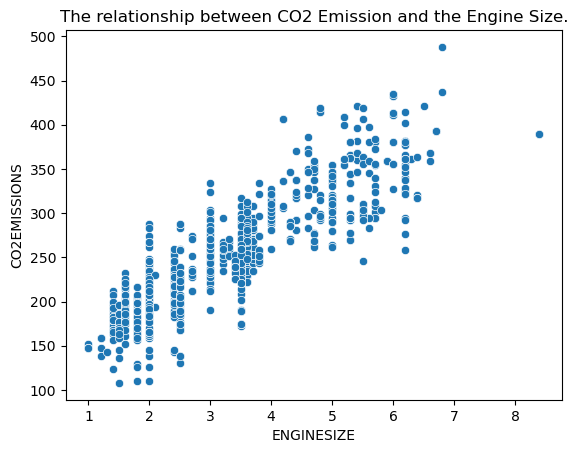

In [257]:
sns.scatterplot(x='ENGINESIZE',y='CO2EMISSIONS',data=data)
plt.title("The relationship between CO2 Emission and the Engine Size.")
# Show plot
plt.show()


📝 Do you think that a linear regression model would fit well here? Why?

It could be appropriate model since we have 2 different continuos variables and we are training the predict the relationship between them. (That's the regression problem). Assumption of a linear relationship between the response Y and a single predictor variable X.

## Part 3 - Regression using Scikit-learn
 
__HINT__: as you will be performing the same operations multiple times on different data sets with different variables, you might want to wrap some pieces of code in functions in order to be able to reuse it easily in different places of your notebook! The plot function has been provided to you, but you can do the same to compute the performances and 

### 3. Train a linear regression model (with scikit-learn) for the prediction of the CO2 emission based exclusively on the engine size (do not forget about the train-test split you did previously).

### 5. Plot the regression line.

### Here I have tried to create class -

This class encapsulates the functionalities for linear regression analysis, including data splitting, model fitting, prediction, obtaining parameters, plotting the regression line, and calculating the correlation. I have also computed paramaters by myself, here I just wanted to automatize the process a bit. 

In [258]:
class LinearRegressionCumulative:
    def __init__(self, alpha=0.05):
        self.alpha = alpha
        self.regressor = LinearRegression()

    def split(self, dataframe: pd.DataFrame, dependent_v: str, independent_v: str):
        X = dataframe[[independent_v]].values
        y = dataframe[[dependent_v]].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        return X_train, X_test, y_train, y_test

    def fit(self, X, y):
        self.regressor.fit(X, y)
    
    def predict(self, X):
        return self.regressor.predict(X)
    
    def get_parameters(self, X_test, y_test):
        predictions = self.predict(X_test)
        Beta_0 = self.regressor.intercept_
        Beta_1 = self.regressor.coef_
        MSE = mean_squared_error(y_test, predictions)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MAE = mean_absolute_error(y_test, predictions)

        parameters = {
            "Beta_0 - Intercept": Beta_0,
            "Beta_1 - Coefficient": Beta_1,
            "MSE": MSE,
            "RMSE": RMSE,
            "MAE": MAE
        }
        return parameters
    
    def plot_regression(self, X, y, X_test, y_test):
        X_regression_line = X_test.squeeze()
        y_regression_line = self.predict(X_test).reshape(-1, 1)
        plt.figure(figsize=(16, 8))
        plt.scatter(X, y, c='lightgray', label='training set')
        plt.scatter(X_test, y_test, c='black', label='test set')
        plt.plot(X_regression_line, y_regression_line, c='blue', label='regression line', linewidth=2)
        # Calculate confidence intervals
        confidence = 0.95
        y_hat = self.predict(X_test)
        s_err = np.sum((np.log(y_test) - np.log(y_hat))**2) / (len(X_test) - 2)
        conf = np.sqrt(s_err * (1/len(X_test) + (X_test - np.mean(X))**2 / np.sum((X_test - np.mean(X))**2)))
        upper = np.exp(np.log(y_regression_line) + stats.t.ppf(1 - (1 - confidence) / 2, len(X_test) - 1) * conf)
        lower = np.exp(np.log(y_regression_line) - stats.t.ppf(1 - (1 - confidence) / 2, len(X_test) - 1) * conf)
        # Plotting the confidence intervals
        plt.fill_between(X_regression_line, lower.flatten(), upper.flatten(), color='yellow', alpha=0.3, label='Confidence Interval')
        plt.xlabel("Feature")
        plt.ylabel("Target")
        plt.legend()
        plt.show()
        
    
    @staticmethod
    def correlation(y_test, y_pred):
        print("R2-score: %.2f" % r2_score(y_test , y_pred))


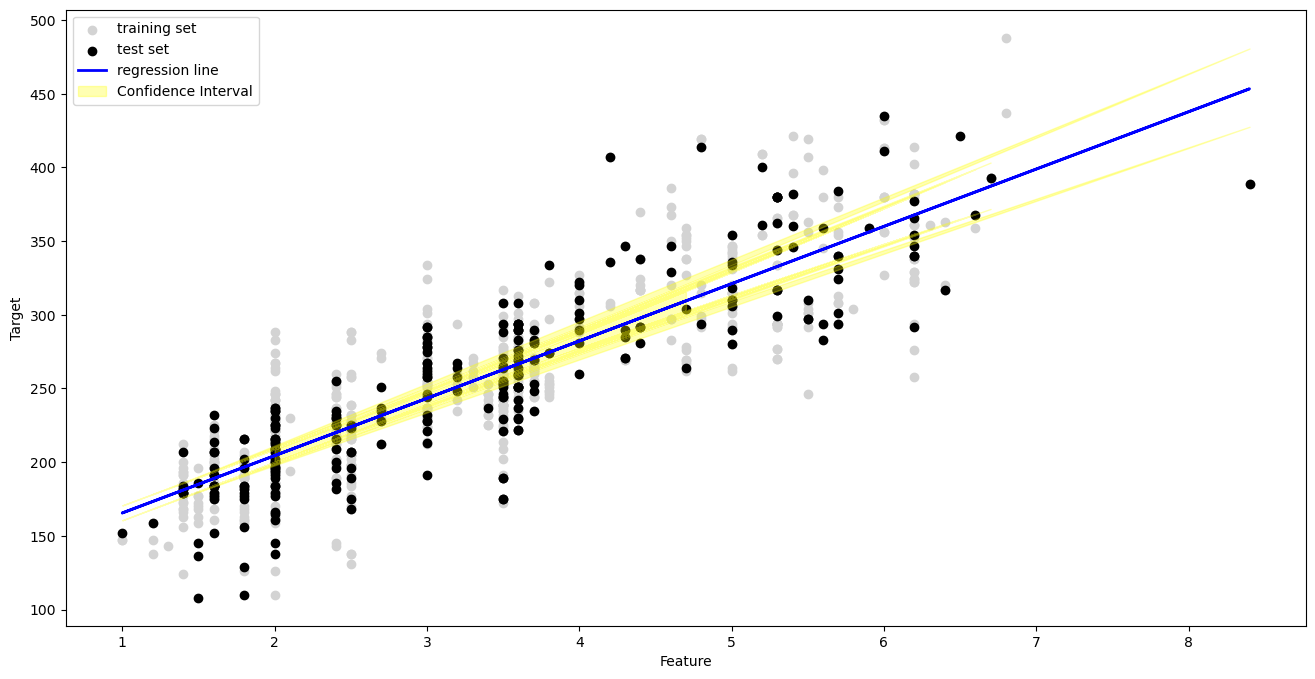

R2-score: 0.77
Model Parameters:
Beta_0 - Intercept: [126.62361301]
Beta_1 - Coefficient: [[38.89375359]]
MSE: 972.1181539625659
RMSE: 31.178809373716724
MAE: 23.80428191911295


In [259]:
# Linear regression based on engine size
my_linear_regression_engine = LinearRegressionCumulative()
X_train, X_test, y_train, y_test = my_linear_regression_engine.split(data, dependent_v='CO2EMISSIONS', independent_v='ENGINESIZE')
my_linear_regression_engine.fit(X_train, y_train)
predictions_engine = my_linear_regression_engine.predict(X_test)
my_linear_regression_engine.plot_regression(X_train, y_train, X_test, y_test)
parameters_engine = my_linear_regression_engine.get_parameters(X_test, y_test)
my_linear_regression_engine.correlation(y_test, predictions_engine)

parameters = my_linear_regression_engine.get_parameters(X_test, y_test)
print("Model Parameters:")
for key, value in parameters_engine.items():
    print(key + ":", value)

### 4. What are the parameters of the regression line?  

📝 Interpret the parameters by answer the following question: *If an engine size is increased by 1 L, what would be the CO2 emission increase as predicted by your model?*  

Model Parameters: The model's parameters indicate that the intercept, representing the predicted CO2 emissions when the engine size is zero, is approximately 126.62 g/km. Additionally, an increase of one unit (1L) in engine size corresponds to a predicted increase in CO2 emissions by approximately 38.9 g/km.

Correlation and Model Performance: The model demonstrates a strong correlation between CO2 emissions and engine size, as evidenced by the coefficient of determination (R2-score) of approximately 0.77. While this indicates that the model explains 77% of the variance in CO2 emissions, it falls slightly short of the initial correlation coefficient of 0.87. However, an R2-score of 0.77 still suggests a reasonably good fit for the model.

Comparison with Baseline Model: Comparing the model's performance with a baseline model reveals significant improvements. The mean absolute error (MAE) and R2-score of the model are notably better than those of the baseline model, indicating a more accurate prediction of CO2 emissions.

Evaluation Metrics: The model's performance metrics, including mean squared error (MSE), root mean squared error (RMSE), and MAE, provide further insights into its predictive accuracy. While the MAE suggests that, on average, the model's predictions are relatively close to the actual values, the MSE and RMSE indicate some variance in the predictions compared to the actual values.

Insights and Implications: Overall, the model offers valuable insights into the relationship between engine size and CO2 emissions. While it may not capture all underlying patterns in the data, it provides a useful framework for predicting emissions based on engine size.


NOTE: I WANT TO POINT OUT THE GRADING DESCEND BONUS EXERCISE THAT I DID, THE RESULTS WERE: Iteration 1000: beta=(126.54, 38.92), cost=469.12 which aligns with the current findings

### 6. Evaluate the performance of the model (MSE, RMSE, MAE, $R^2$). For this assigment, calculate the three first metrics **manually** (i.e. without using Scikit-learn's handy methods). However you can check your results with it! R^2 score is the only metric that you are not required to calculate by hand.

In [260]:
# Calculate mean squared error (MSE)
MSE = np.mean((y_test - my_linear_regression_engine.predict(X_test))**2)
# Calculate root mean squared error (RMSE)
RMSE = np.sqrt(np.mean((y_test - my_linear_regression_engine.predict(X_test))**2))
# Calculate mean absolute error (MAE)
MAE = np.mean(np.abs(y_test - my_linear_regression_engine.predict(X_test)))
# Calculate R2
r2= r2_score(y_test , my_linear_regression_engine.predict(X_test))

parameters = {
            "MSE": MSE,
            "RMSE": RMSE,
            "MAE": MAE,
            "R2":r2}
for key, value in parameters.items():
    print(key + ":", value)

## I have explained the results in the previous exercise.

MSE: 972.1181539625659
RMSE: 31.178809373716724
MAE: 23.80428191911295
R2: 0.765640235893562


### 7. Plot the distribution of the residuals (i.e. the error terms).

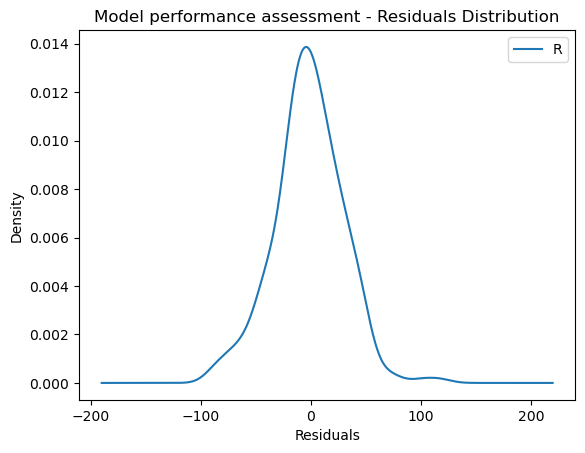

In [261]:
errors_terms_engine=pd.DataFrame(y_test-my_linear_regression_engine.predict(X_test))
errors_terms_engine.plot(kind='density')
plt.title('Model performance assessment - Residuals Distribution')
plt.xlabel('Residuals')
plt.legend('R')
plt.show()


Conclusion: The residuals (the differences between observed and predicted values) of a statistical model follow a Gaussian distribution.

### 8. Compute all four performance metrics for an untrained regression model where the intercept ($\beta_0$) and the coefficient ($\beta_1$) would be both 0. 

📝 Are you surprised by the measured performance?

The trained model has better performance metrics compared to the untrained one. The MSE, RMSE, and MAE values are all lower for the trained model, indicating that it provides better predictions with smaller errors. Additionally, the R2 score, which measures the goodness of fit of the model, is higher for the trained model, indicating that it explains a larger proportion of the variance in the data. Overall, this improvement in performance is expected as the trained model has learned from the data and adjusted its parameters accordingly to better fit the underlying patterns.

### 9. Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB) and evaluate its performance. 

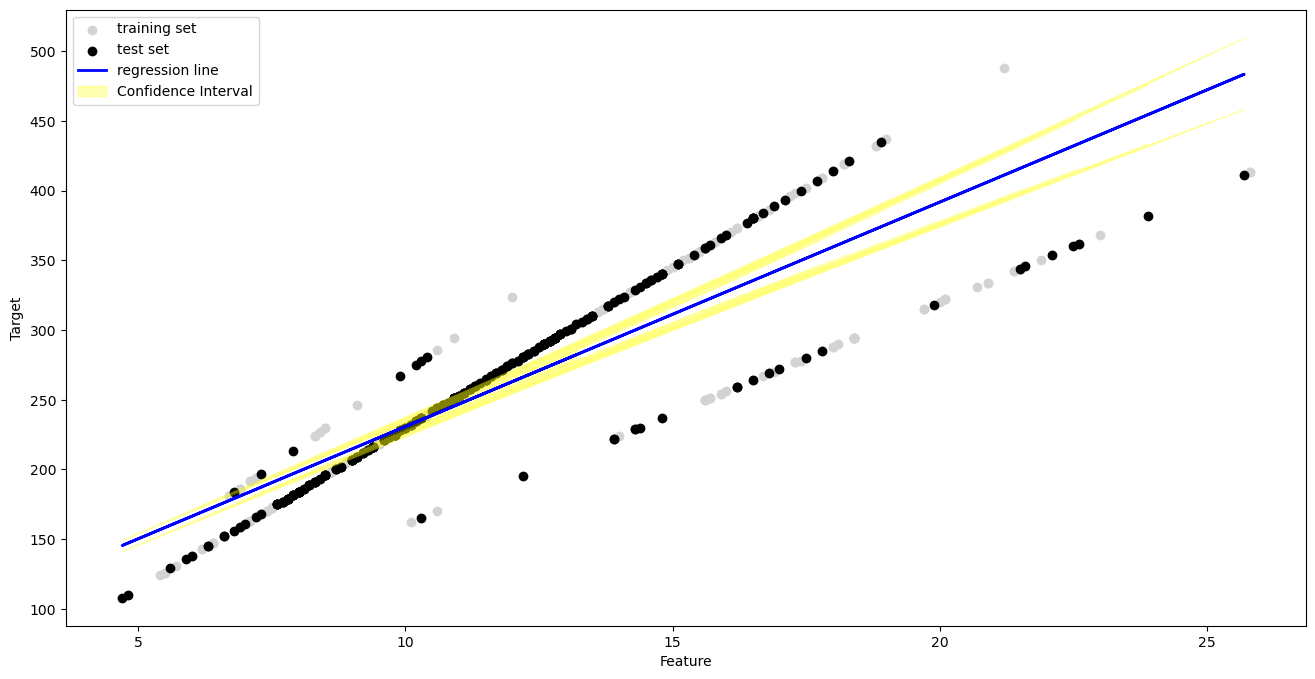

R2-score: 0.80
Model Parameters:
Beta_0 - Intercept: [69.8391428]
Beta_1 - Coefficient: [[16.09375823]]
MSE: 832.9654185141063
RMSE: 28.86114028437037
MAE: 21.25028577502213


In [262]:
# Linear regression based on fuel consumption
my_linear_regression_fuel = LinearRegressionCumulative()
X_train, X_test, y_train, y_test = my_linear_regression_fuel.split(data, dependent_v='CO2EMISSIONS', independent_v='FUELCONSUMPTION_COMB')
my_linear_regression_fuel.fit(X_train, y_train)
predictions_fuel = my_linear_regression_fuel.predict(X_test)
my_linear_regression_fuel.plot_regression(X_train, y_train, X_test, y_test)
parameters_fuel = my_linear_regression_fuel.get_parameters(X_test, y_test)
my_linear_regression_fuel.correlation(y_test, predictions_fuel)

# Print parameters
print("Model Parameters:")
for key, value in parameters_fuel.items():
    print(key + ":", value)



- The R2-score, approximately 0.77, indicates that the model explains 80% of the variance in CO2 emissions based on Fuel Consumption CB . Note that, the initial correlation coefficient of 0.81 suggests a strong linear relationship between Fuel Consumption CB and CO2 emissions, the R2-score of 0.80 indicates that my model captures almost exact relationship. 

📝 Compare with the metrics computed in question 7 (the model trained on the engine size). What can you conclude?

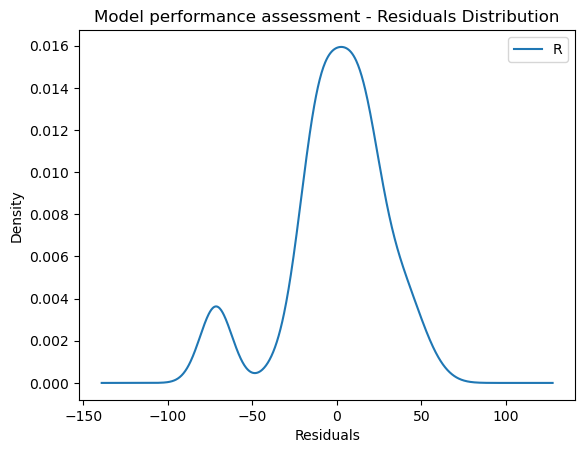

In [263]:
errors_terms_fuel=pd.DataFrame(y_test-my_linear_regression_fuel.predict(X_test))
errors_terms_fuel.plot(kind='density')
plt.title('Model performance assessment - Residuals Distribution')
plt.xlabel('Residuals')
plt.legend('R')
plt.show()




A negative bump in the distribution of residuals implies that the model tends to consistently underestimate the target variable. This suggests that the model's predictions are generally lower than the actual observed values for those specific data points. Identifying and understanding such patterns in the residuals can provide insights into potential areas for model improvement or data refinement.

### 10. Go back to your "dummy" model that you built in part 1, which simply predicted the mean CO2, regardless of the input engine size (or any feature at all in fact). Plot the regression line of this model once more and calculate its performance. 

MSE: 4149.411758210441
RMSE: 64.41592783008284
MAE: 52.5088904494382
R2: -0.00034667274830679773


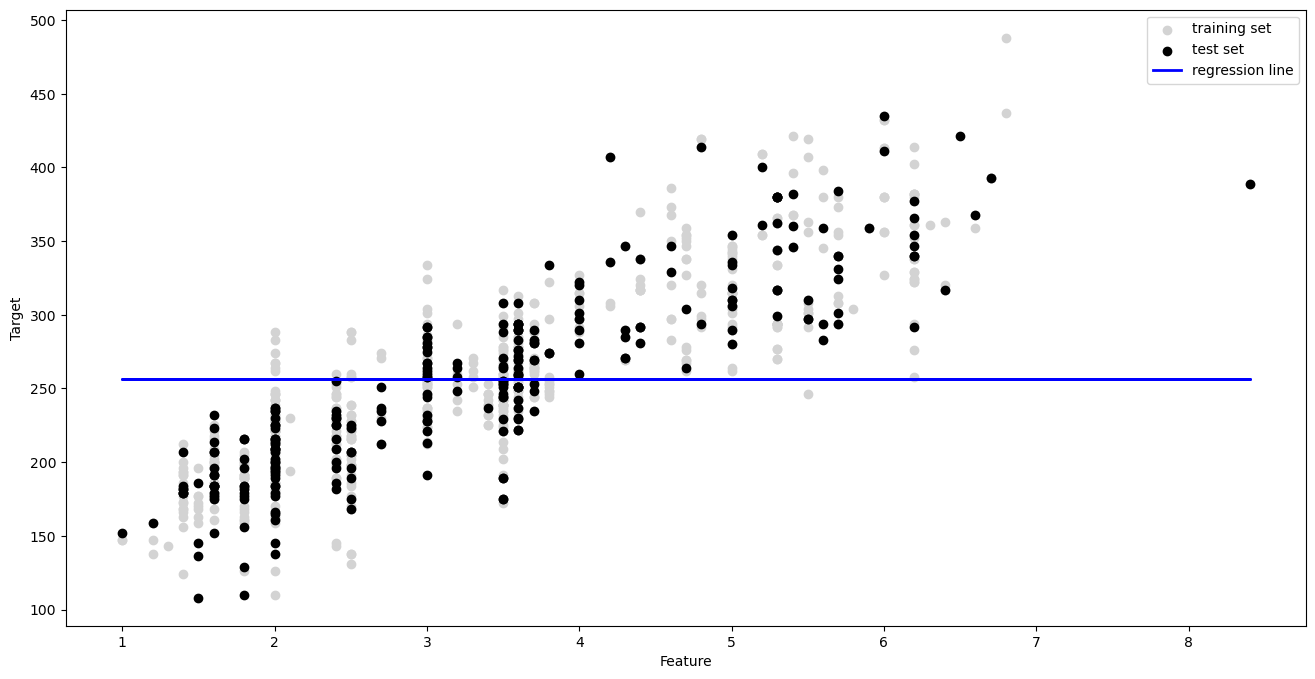

In [264]:

# Assuming dummy_regression is the fitted dummy model and predictions_dummy is the predictions from the dummy 

# Instantiate estimator
dummy_regression = DummyRegression()
# Extract 'ENGINESIZE' column as a NumPy array
X = data[["ENGINESIZE"]].to_numpy()
# Extract 'CO2EMISSIONS' column as a NumPy array
y = data[["CO2EMISSIONS"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) # Use random_state=42 and a test size of 25%
# Fit  estimator to the training data
dummy_regression.fit(X_train, y_train)
# Generate predictions on the test data
predictions_Model1 = dummy_regression.predict(X_test)
MSE = mean_squared_error(y_test, predictions_Model1)
RMSE = mean_squared_error(y_test, predictions_Model1, squared=False)
MAE = mean_absolute_error(y_test, predictions_Model1)
r2 = r2_score(y_test, predictions_Model1)

parameters = {
    "MSE": MSE,
    "RMSE": RMSE,
    "MAE": MAE,
    "R2": r2
}

for key, value in parameters.items():
    print(key + ":", value)

plot_regression(X_train, y_train, X_test, y_test, dummy_regression)

📝 How does the performance compare to the the other models'? Can you explain why?  

- Model 2: Trained with intercept and one independent variable, both set to 0:
  Test MSE: 3703.78
  R2 score: 0.107
- Model 1: Dummy regression with only intercept (set to 0):
  MSE: 4149.41
  R2: -0.00035
- Model 4: Trained model with regression kit:
  MSE: 972.12
  R2: 0.766
- Model 3: Trained model with gradient descent (500 iterations):
  Test MSE: 968.75
  R2 score: 0.766

Comments:

Model 3 (trained with gradient descent) has the lowest test MSE among the trained models, indicating the best predictive accuracy on unseen data.
Model 3 also has the highest R2 score among the trained models, indicating that it explains the most variance in the target variable.
Model 2 performs better than the dummy regression (Model 1), suggesting that even a simple linear model with one independent variable (albeit set to 0) can capture more information than just predicting the mean (dummy regression).


The significant improvement in performance metrics for the trained models compared to the baseline model demonstrates the effectiveness of the training process. The trained models have learned meaningful patterns and relationships in the data, resulting in more accurate predictions. Gradient descent optimization has iteratively updated the model parameters to minimize prediction errors, leading to better overall performance. Additionally, the positive score of R2 (0.77-0.76) the trained models indicate that it explains a substantial portion of the variance in the target variable.

Last Point While a high initial correlation (0.87) Co2 Emission versus Engine size suggests a strong linear relationship between the variables, it doesn't guarantee optimal predictive performance. Factors such as non-linearity, overfitting/underfitting, feature engineering, model complexity, and optimization algorithms all play crucial roles in determining the effectiveness of a predictive model. Further analysis and experimentation might be necessary to identify the specific reasons for the observed differences in model performance.




# Optional Questions (for the most advanced students)
You will find online the necessary information to do these extra exercises. You can have a look at the **statsmodels** and **seaborn** libraries.

## A) Evaluate the statistical significance of the model parameters found in question 4

In [265]:

## Lets Start!
predictions_engine = my_linear_regression_engine.predict(X_test)
# Calculate residuals
residuals = y_test - predictions_engine
# Calculate sum of squares of predictor variable
x_mean = np.mean(X_test)
Sxx = np.sum((X_test - x_mean)**2)
# Calculate mean squared error (MSE) - We can do it automatically too. 
n = len(y_test)
MSE = np.sum(residuals**2) / (n - 2)
# Calculate standard error of coefficient estimate
SE_beta1 = np.sqrt(MSE / Sxx)
print("Standard Error of Coefficient Estimate (Beta_1):", SE_beta1)



# Coefficient estimate, null hypothesized value, and standard error
beta_1 = 38.89375359
null_hypothesized_value = 0
standard_error = SE_beta1  # We need the standard error of the coefficient to complete this calculation


# Calculate the t-statistic
t_statistic = (beta_1 - null_hypothesized_value) / standard_error


# Determine the critical value (two-tailed test)
alpha = 0.05  # Significance level
degrees_of_freedom = n - 2  # For simple linear regression
critical_value = stats.t.ppf(1 - alpha/2, degrees_of_freedom)  # Two-tailed test

# Compare test statistic and critical value
if np.abs(t_statistic) > critical_value:
    print("Reject the null hypothesis. The coefficient is statistically significant.")
else:
    print("Fail to reject the null hypothesis. The coefficient is not statistically significant.")




Standard Error of Coefficient Estimate (Beta_1): 1.3525666904397888
Reject the null hypothesis. The coefficient is statistically significant.


## B) Display the regression line of question 5 with its confidence interval. Write a short paragraph to interpret what it means

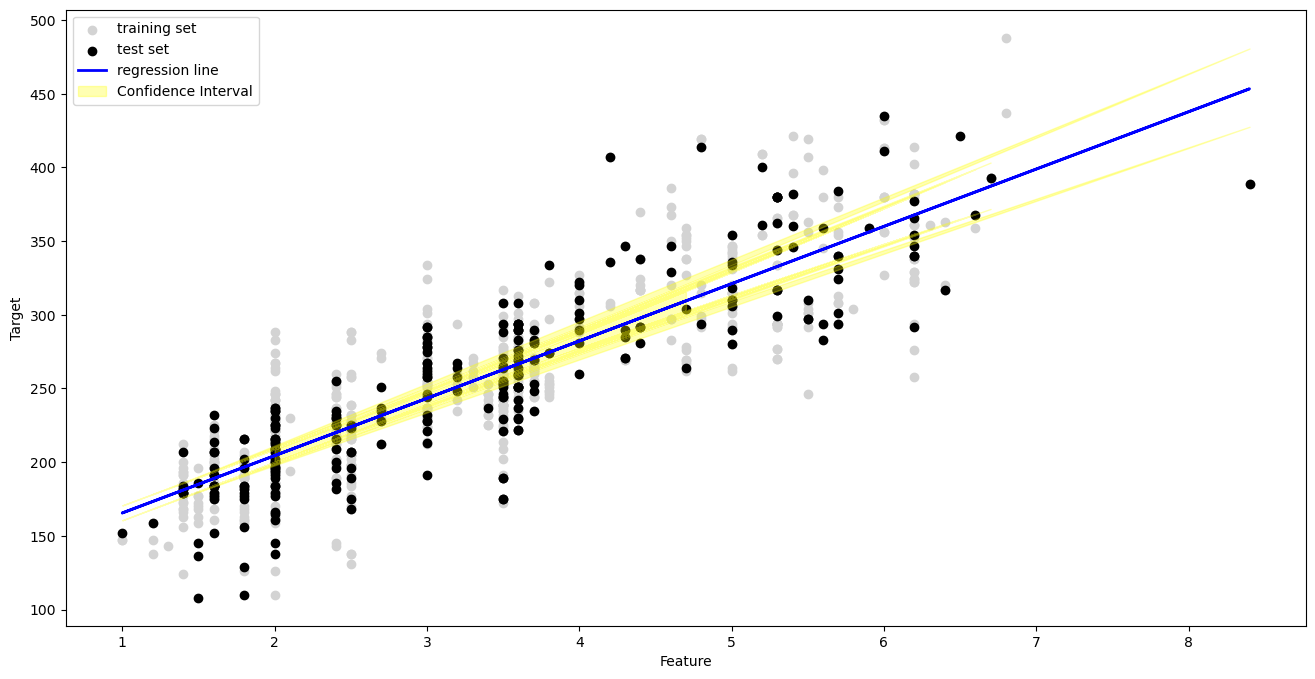

In [266]:
my_linear_regression_engine.plot_regression(X_train, y_train, X_test, y_test)


In the specific case of CO2 emission regression with engine size, while the confidence interval becomes wider as the engine size increases, it implies that the relationship between engine size and CO2 emissions becomes more uncertain for larger engine sizes. This could suggest that other factors or variables not accounted for in the model may have a greater influence on CO2 emissions for larger engines, leading to increased variability in the predictions.